## Etapa 1 - Instalação das Bibliotecas

In [42]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn
%pip install networkx 
%pip install scipy



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import networkx as nx
from itertools import combinations
import scipy


In [44]:
import scipy

## Etapa 2 - Leitura do DataFrame

In [59]:
df = pd.read_csv('Mestrado_UFABC\BaseG - Graduação\BaseG (1)\BaseG\BaseG---Projetos-pesquisa.csv',
    delimiter='\t',
    engine='python',
    on_bad_lines='skip',
    encoding='utf-8'
)
df

,ID-Lattes,Nome,Início-participação,Fim-participação,Título,Natureza,Situação,Flag-inovação,Alunos-graduação,Alunos-especialização,Alunos-mestrado-acadêmico,Alunos-mestrado-profissional,Alunos-doutorado,Autores,Quantidade-autores,Financiadores,Quantidade-financiadores,Descrição,Unnamed: 18
0,'9999981954791108,Ted Lincoln Martins Pontes,2002,2014.0,Padrões de ocupação do bairro da Boa Viagem (R...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"PONTES, T. L. M.; Costa, M.F.; Silva, C.P.; Ma...",5,NaN,0,NaN,NaN
1,'9999950501479714,Thiago Tambara,2010,2011.0,Mapeamento do atendimento de neoplasias em ani...,PESQUISA,EM_ANDAMENTO,NaN,0,0,0,0,0,"DUARTE, J.; TAMBARA, T.",2,Universidade Paulista,1,Na Medicina Veterinária dados epidemiológicos ...,NaN
2,'9999844050552984,Mayara Costa e Silva,2016,2017.0,Síntese e caracterização de vidros teluritos d...,PESQUISA,CONCLUIDO,NAO,1,0,0,0,1,"SILVA, M. C.; LIMA, S. M.; SOUZA, A. K. R.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Objetivamos estudar as propriedades ópticas de...,NaN
3,'9999844050552984,Mayara Costa e Silva,2015,2016.0,Monitoramento in situ e on line da reação de t...,PESQUISA,CONCLUIDO,NAO,1,0,0,0,1,"SILVA, M. C.; IZIDA, T.; LIMA, S. M.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Neste projeto de pesquisa estudamos a produção...,NaN
4,'9999781002036706,Amanda dos Santos Pinheiro,2020,2021.0,Núcleo de Pesquisa em Tecnologias em Enfermage...,PESQUISA,DESATIVADO,NAO,20,0,0,0,0,"PINHEIRO, A. S.; FERREIRA, R.; VIANA, I. O. L....",7,NaN,0,"Sou membro do NUTEC, participo como estudante ...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544434,'0000042406418164,Leonardo Machado de Araujo,2018,2019.0,A fuga do estado de guerra das Hienas- uma aná...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"ARAUJO, L. M.",1,NaN,0,NaN,NaN
544435,'0000027477345359,Gustavo Hauenstein Rosa,2022,NaN,Impacto do Teste de Exercício Cardiopulmonar n...,PESQUISA,EM_ANDAMENTO,SIM,2,0,0,1,1,"ROSA, G. H.; BERTON, D. C.; LITIELE WAGNER",3,NaN,0,O projeto busca estabelecer uma correlação ent...,NaN
544436,'0000027477345359,Gustavo Hauenstein Rosa,2021,NaN,"Estudo de Fase 2, randomizado, duplo-cego, con...",PESQUISA,EM_ANDAMENTO,NAO,0,0,0,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,NaN,NaN
544437,'0000027477345359,Gustavo Hauenstein Rosa,2021,2022.0,Valor prognóstico da dessaturação da oxihemogl...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,Período de realização: de 01/10/2021 até 31/08...,NaN


## Etapa 3 – Visualização geral do DataFrame

In [46]:
df.shape

(544439, 19)

In [47]:
df.columns

Index(['ID-Lattes', 'Nome', 'Início-participação', 'Fim-participação',
       'Título', 'Natureza', 'Situação', 'Flag-inovação', 'Alunos-graduação',
       'Alunos-especialização', 'Alunos-mestrado-acadêmico',
       'Alunos-mestrado-profissional', 'Alunos-doutorado', 'Autores',
       'Quantidade-autores', 'Financiadores', 'Quantidade-financiadores',
       'Descrição', 'Unnamed: 18'],
      dtype='object')

In [48]:
df.dtypes

ID-Lattes                        object
Nome                             object
Início-participação               int64
Fim-participação                float64
Título                           object
Natureza                         object
Situação                         object
Flag-inovação                    object
Alunos-graduação                  int64
Alunos-especialização             int64
Alunos-mestrado-acadêmico         int64
Alunos-mestrado-profissional      int64
Alunos-doutorado                  int64
Autores                          object
Quantidade-autores                int64
Financiadores                    object
Quantidade-financiadores          int64
Descrição                        object
Unnamed: 18                     float64
dtype: object

In [49]:
df.info

<bound method DataFrame.info of                 ID-Lattes                        Nome  Início-participação  \
0       '9999981954791108  Ted Lincoln Martins Pontes                 2002   
1       '9999950501479714              Thiago Tambara                 2010   
2       '9999844050552984        Mayara Costa e Silva                 2016   
3       '9999844050552984        Mayara Costa e Silva                 2015   
4       '9999781002036706  Amanda dos Santos Pinheiro                 2020   
...                   ...                         ...                  ...   
544434  '0000042406418164  Leonardo Machado de Araujo                 2018   
544435  '0000027477345359     Gustavo Hauenstein Rosa                 2022   
544436  '0000027477345359     Gustavo Hauenstein Rosa                 2021   
544437  '0000027477345359     Gustavo Hauenstein Rosa                 2021   
544438  '0000014832079134      Vitor Silveira Pereira                 2021   

        Fim-participação       

## Etapa 4 – Verificação de dados ausentes & tratamento

In [50]:
missing_percentage_per_column = df.isnull().mean() * 100
missing_percentage_per_column = missing_percentage_per_column.sort_values(ascending=False)


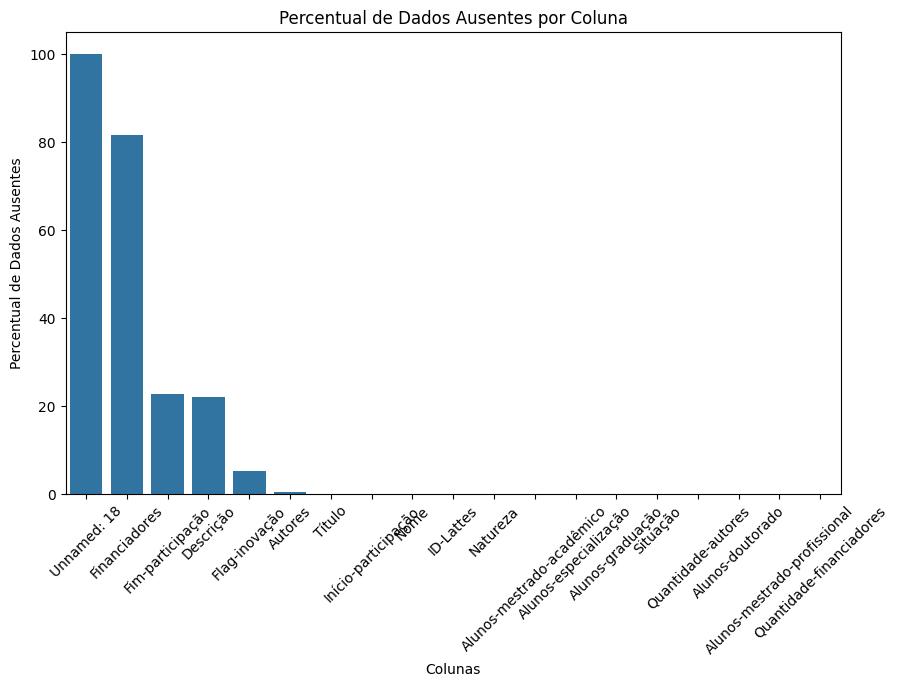

In [51]:

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage_per_column.index, y=missing_percentage_per_column.values)
plt.xticks(rotation=45)
plt.xlabel('Colunas')
plt.ylabel('Percentual de Dados Ausentes')
plt.title('Percentual de Dados Ausentes por Coluna')
plt.show()

In [52]:
#Exclusão da coluna 'unnamed:18'

df.dropna(subset=['Unnamed: 18'], inplace=True)

In [53]:
#Corrigindo campo da data

df['Início-participação'] = df['Início-participação'].astype('Int64')
df['Fim-participação'] = df['Fim-participação'].astype('Int64') 
df

,ID-Lattes,Nome,Início-participação,Fim-participação,Título,Natureza,Situação,Flag-inovação,Alunos-graduação,Alunos-especialização,Alunos-mestrado-acadêmico,Alunos-mestrado-profissional,Alunos-doutorado,Autores,Quantidade-autores,Financiadores,Quantidade-financiadores,Descrição,Unnamed: 18


## Análises

In [60]:
# Criação da coluna com o ano atual
ano_atual = datetime.now().year

# Condição de defasagem
cond_defasagem = (
    (df['Situação'] == 'EM_ANDAMENTO') &
    (df['Fim-participação'].notna()) &
    (df['Fim-participação'] < ano_atual)
)

# Marca os casos defasados
df['Defasado'] = False
df.loc[cond_defasagem, 'Defasado'] = True

# Comentário explicativo
df['Comentário'] = ''
df.loc[cond_defasagem, 'Comentário'] = 'Projeto está como EM_ANDAMENTO, mas ano final já passou.'

df[['Início-participação', 'Fim-participação', 'Situação', 'Defasado', 'Comentário']].head()


,Início-participação,Fim-participação,Situação,Defasado,Comentário
0,2002,2014.0,CONCLUIDO,False,
1,2010,2011.0,EM_ANDAMENTO,True,"Projeto está como EM_ANDAMENTO, mas ano final ..."
2,2016,2017.0,CONCLUIDO,False,
3,2015,2016.0,CONCLUIDO,False,
4,2020,2021.0,DESATIVADO,False,


In [61]:
df['Defasado'] = True
df

,ID-Lattes,Nome,Início-participação,Fim-participação,Título,Natureza,Situação,Flag-inovação,Alunos-graduação,Alunos-especialização,...,Alunos-mestrado-profissional,Alunos-doutorado,Autores,Quantidade-autores,Financiadores,Quantidade-financiadores,Descrição,Unnamed: 18,Defasado,Comentário
0,'9999981954791108,Ted Lincoln Martins Pontes,2002,2014.0,Padrões de ocupação do bairro da Boa Viagem (R...,PESQUISA,CONCLUIDO,NAO,0,0,...,0,0,"PONTES, T. L. M.; Costa, M.F.; Silva, C.P.; Ma...",5,NaN,0,NaN,NaN,True,
1,'9999950501479714,Thiago Tambara,2010,2011.0,Mapeamento do atendimento de neoplasias em ani...,PESQUISA,EM_ANDAMENTO,NaN,0,0,...,0,0,"DUARTE, J.; TAMBARA, T.",2,Universidade Paulista,1,Na Medicina Veterinária dados epidemiológicos ...,NaN,True,"Projeto está como EM_ANDAMENTO, mas ano final ..."
2,'9999844050552984,Mayara Costa e Silva,2016,2017.0,Síntese e caracterização de vidros teluritos d...,PESQUISA,CONCLUIDO,NAO,1,0,...,0,1,"SILVA, M. C.; LIMA, S. M.; SOUZA, A. K. R.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Objetivamos estudar as propriedades ópticas de...,NaN,True,
3,'9999844050552984,Mayara Costa e Silva,2015,2016.0,Monitoramento in situ e on line da reação de t...,PESQUISA,CONCLUIDO,NAO,1,0,...,0,1,"SILVA, M. C.; IZIDA, T.; LIMA, S. M.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Neste projeto de pesquisa estudamos a produção...,NaN,True,
4,'9999781002036706,Amanda dos Santos Pinheiro,2020,2021.0,Núcleo de Pesquisa em Tecnologias em Enfermage...,PESQUISA,DESATIVADO,NAO,20,0,...,0,0,"PINHEIRO, A. S.; FERREIRA, R.; VIANA, I. O. L....",7,NaN,0,"Sou membro do NUTEC, participo como estudante ...",NaN,True,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544434,'0000042406418164,Leonardo Machado de Araujo,2018,2019.0,A fuga do estado de guerra das Hienas- uma aná...,PESQUISA,CONCLUIDO,NAO,0,0,...,0,0,"ARAUJO, L. M.",1,NaN,0,NaN,NaN,True,
544435,'0000027477345359,Gustavo Hauenstein Rosa,2022,NaN,Impacto do Teste de Exercício Cardiopulmonar n...,PESQUISA,EM_ANDAMENTO,SIM,2,0,...,1,1,"ROSA, G. H.; BERTON, D. C.; LITIELE WAGNER",3,NaN,0,O projeto busca estabelecer uma correlação ent...,NaN,True,
544436,'0000027477345359,Gustavo Hauenstein Rosa,2021,NaN,"Estudo de Fase 2, randomizado, duplo-cego, con...",PESQUISA,EM_ANDAMENTO,NAO,0,0,...,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,NaN,NaN,True,
544437,'0000027477345359,Gustavo Hauenstein Rosa,2021,2022.0,Valor prognóstico da dessaturação da oxihemogl...,PESQUISA,CONCLUIDO,NAO,0,0,...,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,Período de realização: de 01/10/2021 até 31/08...,NaN,True,


In [56]:
#Descritiva - Qnt. total de Projetos

qnt_projetos = df['Título'].count()

qnt_projetos

np.int64(0)

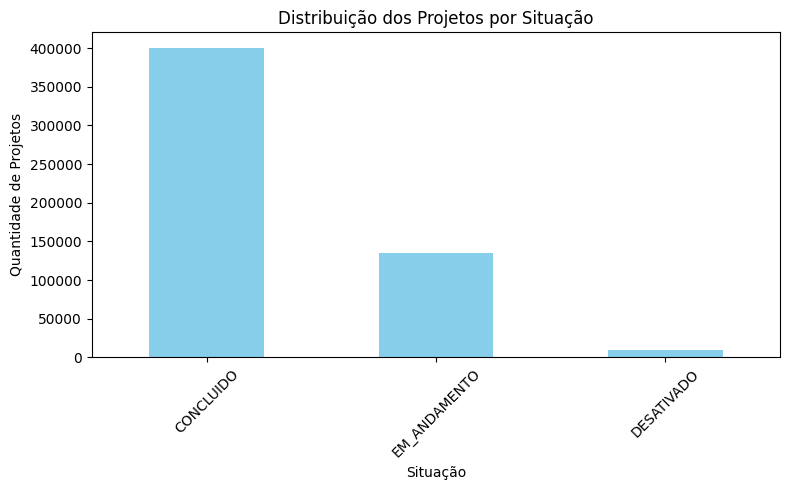

In [62]:
#Descritiva - Qnt. de situações de projetos
df['Situação'].value_counts().plot(kind='bar', figsize=(8, 5), color='skyblue')

plt.title('Distribuição dos Projetos por Situação')
plt.xlabel('Situação')
plt.ylabel('Quantidade de Projetos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
#Contagem sobre a Natureza das pesquisas

lista_natureza = df['Natureza'].value_counts().reset_index()
lista_natureza.columns = ['Natureza', 'contagem']
lista_natureza

,Natureza,contagem
0,PESQUISA,544439


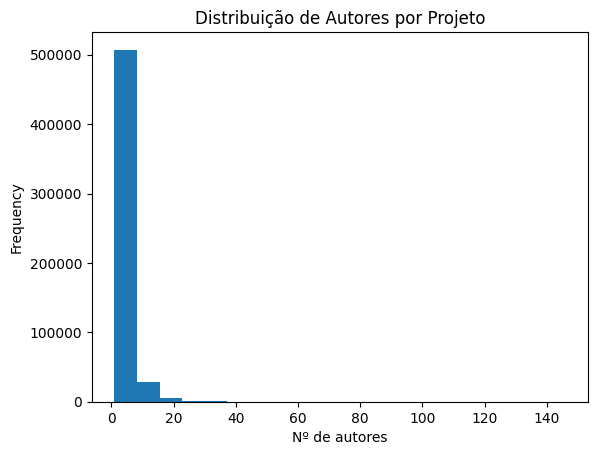

In [ ]:
df['Quantidade-autores'].plot(kind='hist', bins=20, title='Distribuição de Autores por Projeto')
plt.xlabel('Nº de autores')
plt.show()


In [ ]:
print('Projetos com mais de 5 autores:', (df['Quantidade-autores'] > 5).sum())


Projetos com mais de 5 autores: 90518


In [ ]:
#Número médio de autores e financiadores por projeto

media_autores = df['Quantidade-autores'].mean()
media_financiadores = df['Quantidade-financiadores'].mean()

print(f'Média de autores por projeto: {media_autores:.2f}')
print(f'Média de financiadores por projeto: {media_financiadores:.2f}')


Média de autores por projeto: 3.78
Média de financiadores por projeto: 0.20


In [ ]:
df['Financiadores'].value_counts().head(10)


Financiadores
Conselho Nacional de Desenvolvimento Científico e Tecnológico                26517
Fundação de Amparo à Pesquisa do Estado de São Paulo                          8137
Fundação de Amparo à Pesquisa do Estado de Minas Gerais                       4275
Coordenação de Aperfeiçoamento de Pessoal de Nível Superior                   2638
Fundação de Amparo a Pesquisa do Estado do Amazonas                           2335
Fundação Araucária de Apoio ao Desenvolvimento Científico e Tecnológico       2063
Fundação de Amparo à Pesquisa do Estado da Bahia                              1907
Fundação de Amparo à Pesquisa do Estado do Rio Grande do Sul                  1122
Fundação Carlos Chagas Filho de Amparo à Pesquisa do Estado do RJ             1047
Fundação de Amparo à Pesquisa ao Desenvolv. Científico e Tecnológico - MA      960
Name: count, dtype: int64

In [ ]:
#Quantidade de tempo que dura os projetos de pesquisa:

df['contagem_tempo'] = df['Fim-participação'] - df['Início-participação']

df


,ID-Lattes,Nome,Início-participação,Fim-participação,Título,Natureza,Situação,Flag-inovação,Alunos-graduação,Alunos-especialização,Alunos-mestrado-acadêmico,Alunos-mestrado-profissional,Alunos-doutorado,Autores,Quantidade-autores,Financiadores,Quantidade-financiadores,Descrição,Unnamed: 18,contagem_tempo
0,'9999981954791108,Ted Lincoln Martins Pontes,2002,2014.0,Padrões de ocupação do bairro da Boa Viagem (R...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"PONTES, T. L. M.; Costa, M.F.; Silva, C.P.; Ma...",5,NaN,0,NaN,NaN,12.0
1,'9999950501479714,Thiago Tambara,2010,2011.0,Mapeamento do atendimento de neoplasias em ani...,PESQUISA,EM_ANDAMENTO,NaN,0,0,0,0,0,"DUARTE, J.; TAMBARA, T.",2,Universidade Paulista,1,Na Medicina Veterinária dados epidemiológicos ...,NaN,1.0
2,'9999844050552984,Mayara Costa e Silva,2016,2017.0,Síntese e caracterização de vidros teluritos d...,PESQUISA,CONCLUIDO,NAO,1,0,0,0,1,"SILVA, M. C.; LIMA, S. M.; SOUZA, A. K. R.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Objetivamos estudar as propriedades ópticas de...,NaN,1.0
3,'9999844050552984,Mayara Costa e Silva,2015,2016.0,Monitoramento in situ e on line da reação de t...,PESQUISA,CONCLUIDO,NAO,1,0,0,0,1,"SILVA, M. C.; IZIDA, T.; LIMA, S. M.",3,"Fundação de Apoio e Desenvolvimento do Ensino,...",1,Neste projeto de pesquisa estudamos a produção...,NaN,1.0
4,'9999781002036706,Amanda dos Santos Pinheiro,2020,2021.0,Núcleo de Pesquisa em Tecnologias em Enfermage...,PESQUISA,DESATIVADO,NAO,20,0,0,0,0,"PINHEIRO, A. S.; FERREIRA, R.; VIANA, I. O. L....",7,NaN,0,"Sou membro do NUTEC, participo como estudante ...",NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
544434,'0000042406418164,Leonardo Machado de Araujo,2018,2019.0,A fuga do estado de guerra das Hienas- uma aná...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"ARAUJO, L. M.",1,NaN,0,NaN,NaN,1.0
544435,'0000027477345359,Gustavo Hauenstein Rosa,2022,NaN,Impacto do Teste de Exercício Cardiopulmonar n...,PESQUISA,EM_ANDAMENTO,SIM,2,0,0,1,1,"ROSA, G. H.; BERTON, D. C.; LITIELE WAGNER",3,NaN,0,O projeto busca estabelecer uma correlação ent...,NaN,NaN
544436,'0000027477345359,Gustavo Hauenstein Rosa,2021,NaN,"Estudo de Fase 2, randomizado, duplo-cego, con...",PESQUISA,EM_ANDAMENTO,NAO,0,0,0,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,NaN,NaN,NaN
544437,'0000027477345359,Gustavo Hauenstein Rosa,2021,2022.0,Valor prognóstico da dessaturação da oxihemogl...,PESQUISA,CONCLUIDO,NAO,0,0,0,0,0,"ROSA, G. H.; BERTON, D. C.",2,NaN,0,Período de realização: de 01/10/2021 até 31/08...,NaN,1.0


In [ ]:
#Tempo médio de análise

tempo_medio = df['contagem_tempo'].mean()

print(f'O tempo médio de um projeto de pesquisa é de: {tempo_medio:.2f}')

O tempo médio de um projeto de pesquisa é de: 1.20


In [ ]:
#Projetos de Inovação 

lista_inovacao = df['Flag-inovação'].value_counts().reset_index()
lista_inovacao.columns = ['Flag-inovação', 'contagem']
lista_inovacao

,Flag-inovação,contagem
0,NAO,466260
1,SIM,49920


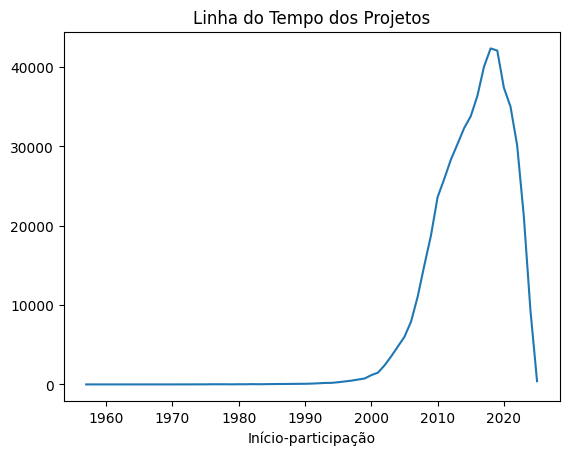

In [ ]:
df['Início-participação'].value_counts().sort_index().plot(kind='line', title='Linha do Tempo dos Projetos')
plt.show()


## Matriz de coatuoria

In [ ]:
# 1. Contar frequência de cada autor
autor_counter = Counter()

for autores_str in df['Autores'].dropna():
    autores = [a.strip() for a in autores_str.split(';') if a.strip()]
    autor_counter.update(autores)

# 2. Definir autores com pelo menos N publicações
N = 10  # ajuste esse número se quiser mais ou menos autores
autores_relevantes = {autor for autor, count in autor_counter.items() if count >= N}

print(f"Autores únicos no total: {len(autor_counter)}")
print(f"Autores com ≥ {N} publicações: {len(autores_relevantes)}")

# 3. Filtrar linhas com pelo menos 2 autores relevantes
def linha_com_autores_relevantes(autores_str):
    autores = [a.strip() for a in str(autores_str).split(';') if a.strip()]
    autores_validos = [a for a in autores if a in autores_relevantes]
    return len(autores_validos) >= 2

df_filtrado = df[df['Autores'].apply(linha_com_autores_relevantes)]

# 4. Criar o grafo
G = nx.Graph()

for autores_str in df_filtrado['Autores'].dropna():
    autores = [a.strip() for a in autores_str.split(';') if a.strip()]
    autores_filtrados = [a for a in autores if a in autores_relevantes]

    for autor1, autor2 in combinations(autores_filtrados, 2):
        if G.has_edge(autor1, autor2):
            G[autor1][autor2]['weight'] += 1
        else:
            G.add_edge(autor1, autor2, weight=1)

# 5. Reduzir para o maior componente conexo (mais relevante para visualização)
if nx.number_connected_components(G) > 1:
    maior_componente = max(nx.connected_components(G), key=len)
    G = G.subgraph(maior_componente).copy()

# 6. Métricas básicas
print("Número de nós (autores):", G.number_of_nodes())
print("Número de arestas (coautorias):", G.number_of_edges())

graus = dict(G.degree())
print("Top 10 autores com mais conexões:")
top_autores = sorted(graus.items(), key=lambda x: x[1], reverse=True)[:10]
for autor, grau in top_autores:
    print(f"{autor}: {grau} conexões")

# 7. Visualização do grafo
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

nx.draw_networkx_nodes(G, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=[d['weight'] for (_, _, d) in G.edges(data=True)], edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=9)

edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title(f'Grafo de Coautoria (Autores com ≥ {N} publicações)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


Autores únicos no total: 778336
Autores com ≥ 10 publicações: 28292
Número de nós (autores): 28216
Número de arestas (coautorias): 517367
Top 10 autores com mais conexões:
SILVA, A. C.: 1011 conexões
SILVA, M. S.: 968 conexões
SILVA, M. A.: 959 conexões
SILVA, A. S.: 931 conexões
SILVA, M. C.: 925 conexões
SILVA, L. S.: 874 conexões
SILVA, A. M.: 868 conexões
SILVA, L. M.: 846 conexões
SANTOS, M. S.: 836 conexões
SILVA, J. M.: 834 conexões


KeyboardInterrupt: 

<Figure size 1200x1000 with 0 Axes>

Número de nós (autores): 28241
Número de arestas (coautorias): 517390


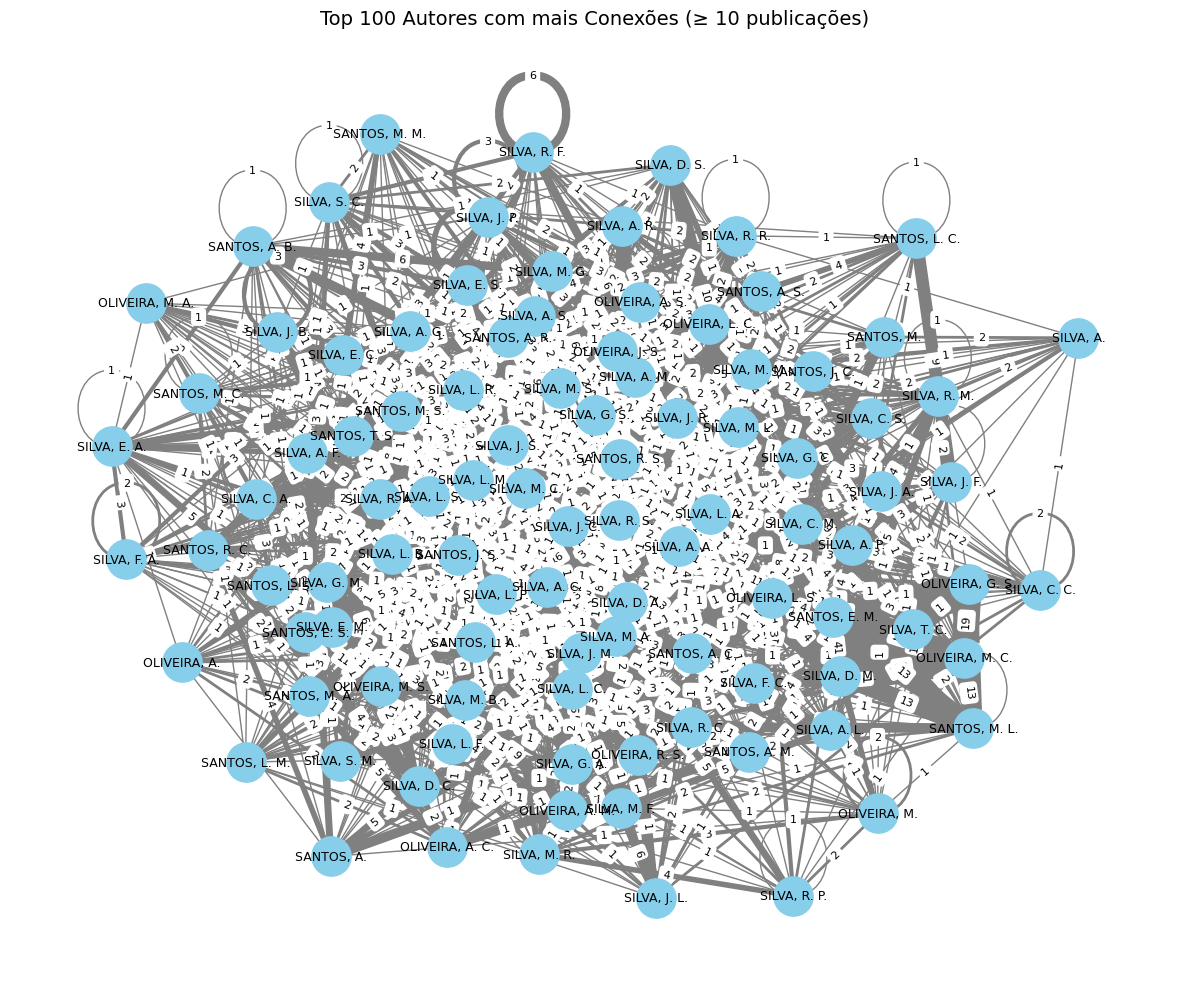

In [ ]:

# 1. Contar frequência de cada autor
autor_counter = Counter()

for autores_str in df['Autores'].dropna():
    autores = [a.strip() for a in autores_str.split(';') if a.strip()]
    autor_counter.update(autores)

# 2. Filtro por autores com publicações suficientes 
N = 10
autores_relevantes = {autor for autor, count in autor_counter.items() if count >= N}

# 3. Filtrar linhas com pelo menos 2 autores relevantes
def linha_com_autores_relevantes(autores_str):
    autores = [a.strip() for a in str(autores_str).split(';') if a.strip()]
    autores_validos = [a for a in autores if a in autores_relevantes]
    return len(autores_validos) >= 2

df_filtrado = df[df['Autores'].apply(linha_com_autores_relevantes)]

# 4. Grafo
G = nx.Graph()

for autores_str in df_filtrado['Autores'].dropna():
    autores = [a.strip() for a in autores_str.split(';') if a.strip()]
    autores_filtrados = [a for a in autores if a in autores_relevantes]

    for autor1, autor2 in combinations(autores_filtrados, 2):
        if G.has_edge(autor1, autor2):
            G[autor1][autor2]['weight'] += 1
        else:
            G.add_edge(autor1, autor2, weight=1)

print("Número de nós (autores):", G.number_of_nodes())
print("Número de arestas (coautorias):", G.number_of_edges())

# 5. Selecionar os 100 autores mais conectados
top_autores = sorted(G.degree, key=lambda x: x[1], reverse=True)[:100]
top_nos = [autor for autor, grau in top_autores]

# 6. Subgrafo com esses autores
G_top = G.subgraph(top_nos).copy()

# 7. Visualizar o subgrafo dos top 100 autores
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_top, seed=42)

nx.draw_networkx_nodes(G_top, pos, node_size=800, node_color='skyblue')
nx.draw_networkx_edges(G_top, pos, width=[d['weight'] for (_, _, d) in G_top.edges(data=True)], edge_color='gray')
nx.draw_networkx_labels(G_top, pos, font_size=9)

edge_labels = nx.get_edge_attributes(G_top, 'weight')
nx.draw_networkx_edge_labels(G_top, pos, edge_labels=edge_labels, font_size=8)

plt.title(f'Top 100 Autores com mais Conexões (≥ {N} publicações)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Extrair as arestas e seus pesos do subgrafo
arestas_data = []
for autor1, autor2, attr in G_top.edges(data=True):
    peso = attr['weight']
    arestas_data.append({'Autor 1': autor1, 'Autor 2': autor2, 'Peso': peso})

# Criar DataFrame com as arestas
df_arestas = pd.DataFrame(arestas_data)

# Mostrar as primeiras linhas da tabela
print(df_arestas.head())


        Autor 1       Autor 2  Peso
0  SILVA, L. C.  OLIVEIRA, M.     1
1  SILVA, L. C.  SILVA, M. S.     2
2  SILVA, L. C.  SILVA, L. C.     1
3  SILVA, L. C.  SILVA, G. S.     1
4  SILVA, L. C.  SILVA, A. R.     3
